In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


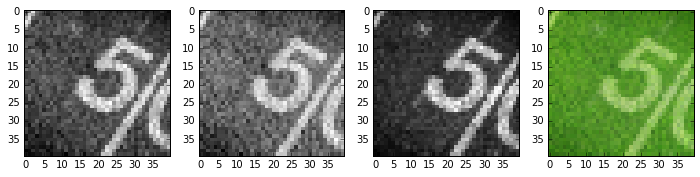

In [2]:
import numpy as np #numpy is imported.
import pandas as pd #pandas is imported.

df = pd.read_csv('A2-Problem.csv',index_col='Pixel',dtype=np.uint8) #CSV file named 
#"A2-Problem.csv" is read into a pandas dataframe named df. The index column of the df is set 
#to be the Pixel column in the CSV file. All the values are read as unsigned 8bit integers.

X = np.stack([df[k].reshape((40,40)) for k in df.columns], axis=2) #Every column of df 
#(where each column contains 1600 entries) is reshaped into a 40x40 ndarray. X contains 
# 3 40x40 ndarrays and these 3 ndarrays represent the R,G,B columns in the CSV file. 
#So X is an ndarray which is 40x40x3. The cells of X correspond to the pixel colors of the 
#image that we are displaying.

figure(figsize=(12,3)) #Figure object is constructed. 

for i in range(X.shape[2]): #for the 3 ndarrays in X
    
    subplot(1,4,i+1); #Create subplots so that every ndarray plot can be in different figures.
    
    imshow(X[:,:,i],interpolation='nearest',cmap=cm.gray); #Display the corresponding 40x40 
    #ndarray as an image in gray scale. (This is done 3 times once for each layer of X)
    #The image shows the number 5 and the portion of another
    #number where these two numbers are separated by a bar. 

subplot(1,4,4); imshow(X,interpolation='nearest'); #Display image using a RGB scale. In order
#to display in RGB scale X is passed in which is a 40x40x3 ndarray. The three 40x40 layers of 
#X are used as R,G and B data respectively. Since the values in the G ndarray are the 
#largest, the 4th image is dominated by the color green.

In [3]:
from sklearn.cluster import KMeans

def KMeansCreatePlots(data):
    klist = [] # store number of clusters
    ilist = [] # store the total distance costs
    
    for k in range(1,10):
        kmeans = KMeans(n_clusters=k) # Number of clusters desired varied from 1 to 9.
        kmeans.fit(data) # create clusters from data
        klist.append(k) 
        ilist.append(kmeans.inertia_)
        C, L = kmeans.cluster_centers_, kmeans.labels_ # store cluster centers and 
        # labels of each data point. 
        figure(figsize=(10,4)) # create figure object.
        for i,m,n in [(1,0,1),(2,1,2),(3,0,2)]:
            ax=subplot(1,3,i) 
            # create scatter plots of the data ndarray and color each point 
            # in accordance with its cluster.
            scatter(data[:,m],data[:,n],c=L,cmap=cm.rainbow, alpha=0.7, edgecolor='none');
            scatter(C[:,m],C[:,n],c='k',marker='o',s=200,alpha=0.4,edgecolor='none');

    figure(); plot(klist,ilist,'o-'); 
    xlabel('# clusters'); ylabel('Total distance (intertia)');
    # This plot shows the total distance cost (inertia) as a function of number of clusters.

    for i in range(len(ilist)-1):
        print('Percent drop of cost from', i+1, 'to', i+2, 'clusters:',
              (ilist[i]-ilist[i+1])/ilist[i]*100,'%')
    # From this plot we can see that this data set naturally contains 
    # 2 clusters. The drop of total cost is maximum (78% drop) from 1 to 2 clusters.
    # Therefore, we need 2 components (clusters). (For original data set.)

Percent drop of cost from 1 to 2 clusters: 78.0577196437 %
Percent drop of cost from 2 to 3 clusters: 44.2532829454 %
Percent drop of cost from 3 to 4 clusters: 28.5060063432 %
Percent drop of cost from 4 to 5 clusters: 25.3567626941 %
Percent drop of cost from 5 to 6 clusters: 20.1279119991 %
Percent drop of cost from 6 to 7 clusters: 19.145625909 %
Percent drop of cost from 7 to 8 clusters: 13.4916751768 %
Percent drop of cost from 8 to 9 clusters: 10.1730804491 %


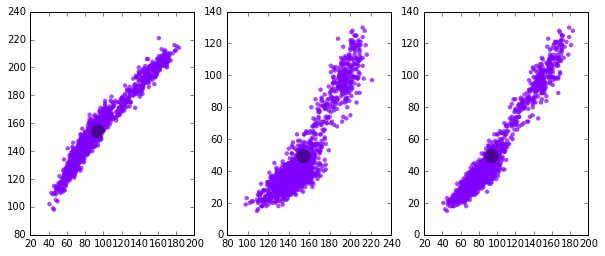

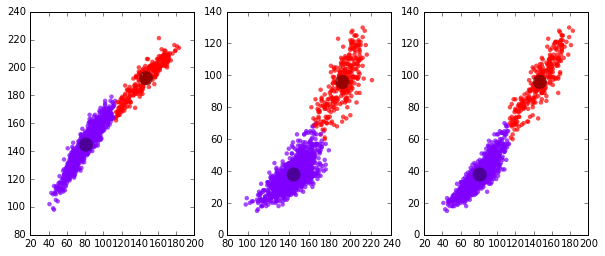

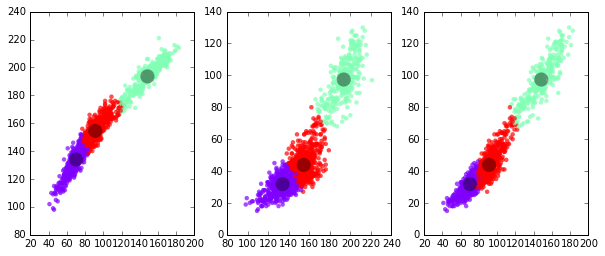

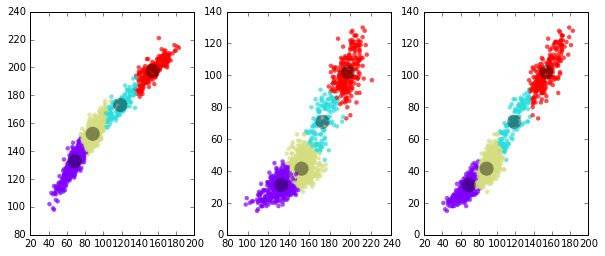

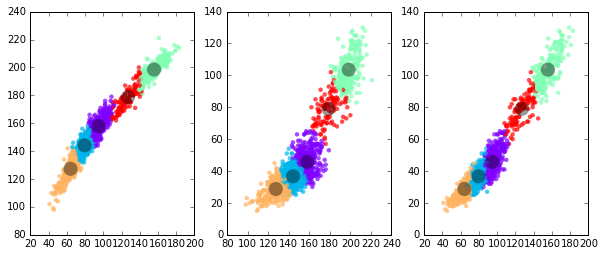

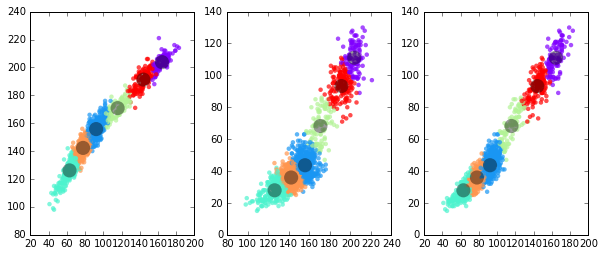

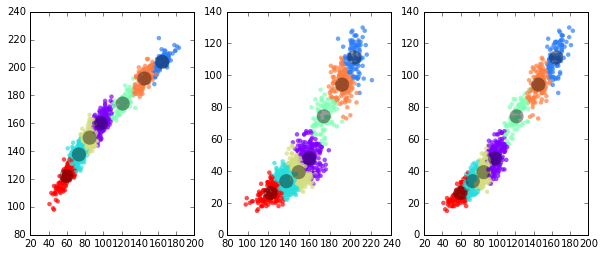

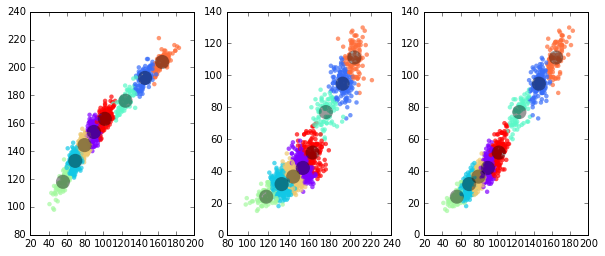

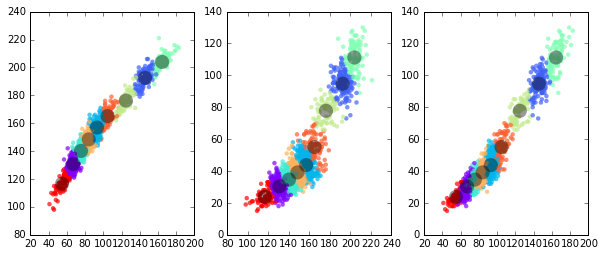

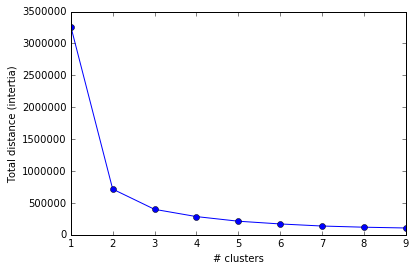

In [4]:
data = df.as_matrix() # convert dataframe into ndarray
KMeansCreatePlots(data)

In [5]:
from sklearn.decomposition import PCA 

pca = PCA(whiten=True)
dataW = pca.fit_transform(data) #preprocess data with whitening.
#With the whitened outcome we observed that the clusters were more well defined. 
#Especially when we look at the 2 cluster case, we see that the first and the 
#third plot are very clustered, which means KMeans performed better.

Percent drop of cost from 1 to 2 clusters: 28.0919861704 %
Percent drop of cost from 2 to 3 clusters: 25.2843471214 %
Percent drop of cost from 3 to 4 clusters: 23.1482614089 %
Percent drop of cost from 4 to 5 clusters: 11.697637176 %
Percent drop of cost from 5 to 6 clusters: 12.2619540862 %
Percent drop of cost from 6 to 7 clusters: 9.29670412343 %
Percent drop of cost from 7 to 8 clusters: 8.39715981903 %
Percent drop of cost from 8 to 9 clusters: 7.80960756563 %


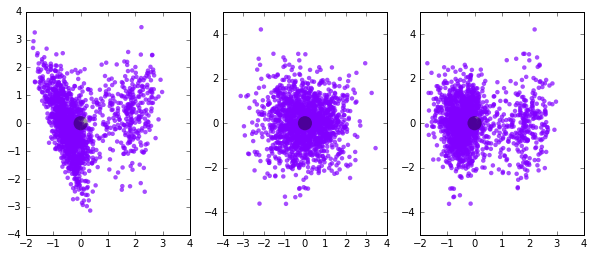

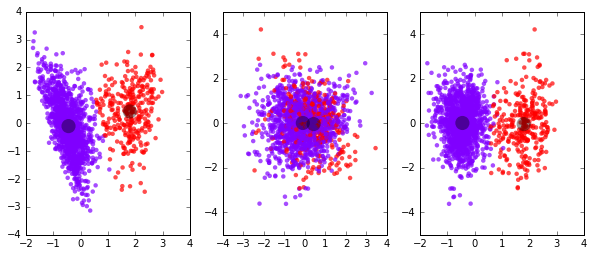

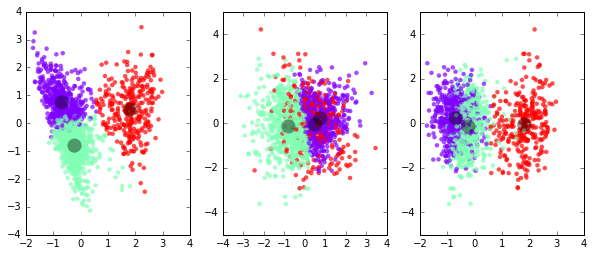

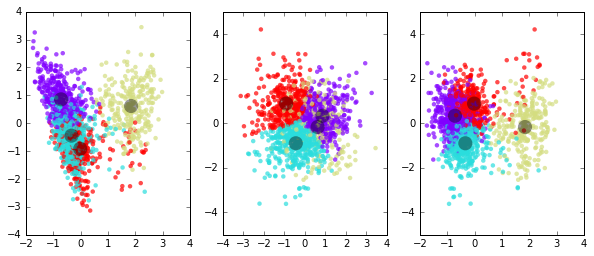

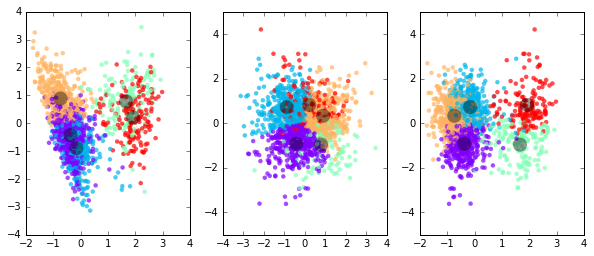

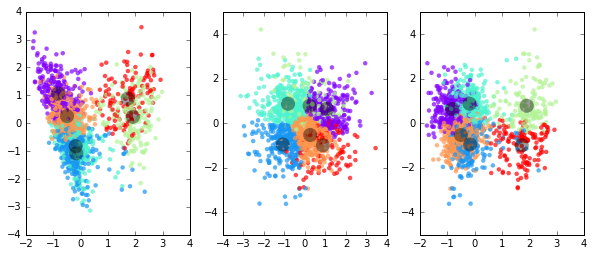

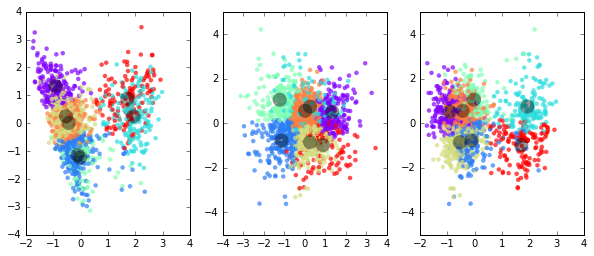

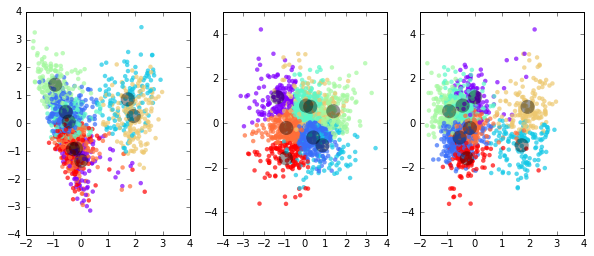

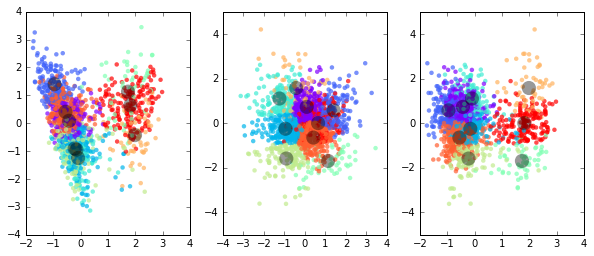

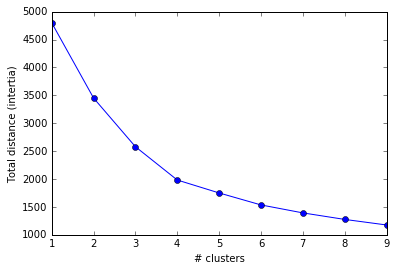

In [6]:
KMeansCreatePlots(dataW)